Visualizar datos

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
data = pd.read_csv('iris.csv')

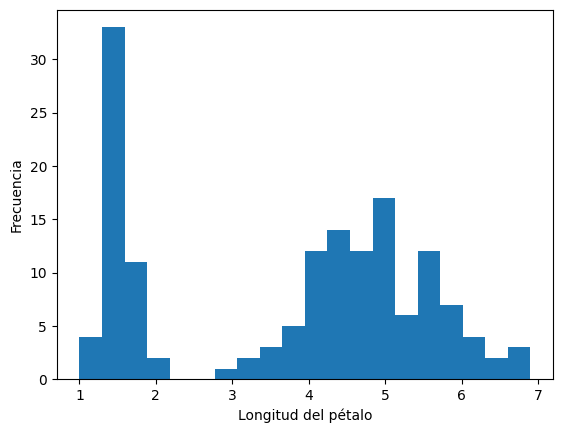

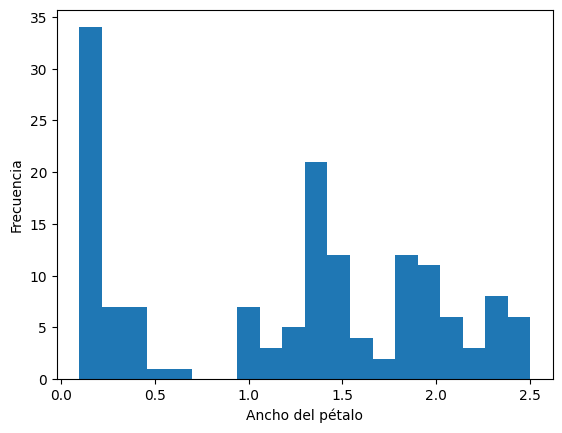

In [46]:
plt.hist(data["petal_length"], bins=20)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Frecuencia")
plt.show()

plt.hist(data["petal_width"], bins=20)
plt.xlabel("Ancho del pétalo")
plt.ylabel("Frecuencia")
plt.show()

In [47]:
import numpy as np 
from sklearn.cluster import KMeans

C:\Users\rebec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


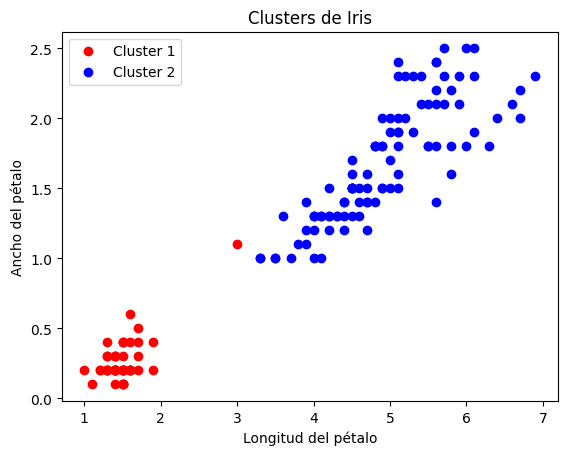

In [48]:
data = pd.read_csv('iris.csv', usecols=['petal_length', 'petal_width'])

# Convertir los datos a un arreglo de numpy
X = data.values
# Ejecutar K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

# Graficar los clusters
plt.title('Clusters de Iris')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='blue', label='Cluster 2')
plt.legend()
plt.show()

C:\Users\rebec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


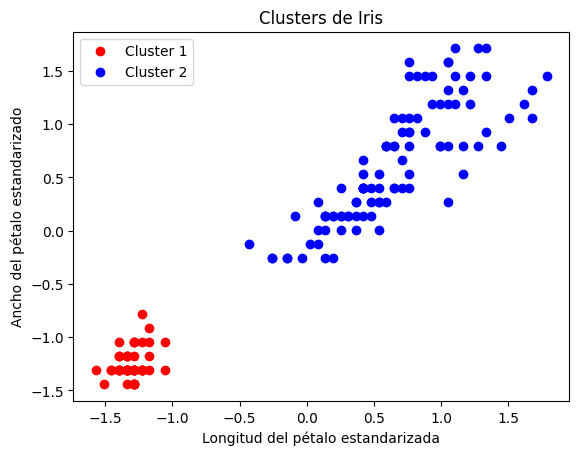

In [51]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('iris.csv', usecols=['petal_length', 'petal_width'])

# Convertir los datos a un arreglo de numpy
X = data.values

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ejecutar K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

# Graficar los clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='blue', label='Cluster 2')
plt.title('Clusters de Iris')
plt.xlabel('Longitud del pétalo estandarizada')
plt.ylabel('Ancho del pétalo estandarizado')
plt.legend()
plt.show()

Al estandarizar los datos se puede ver que la informacion se separa mejor 

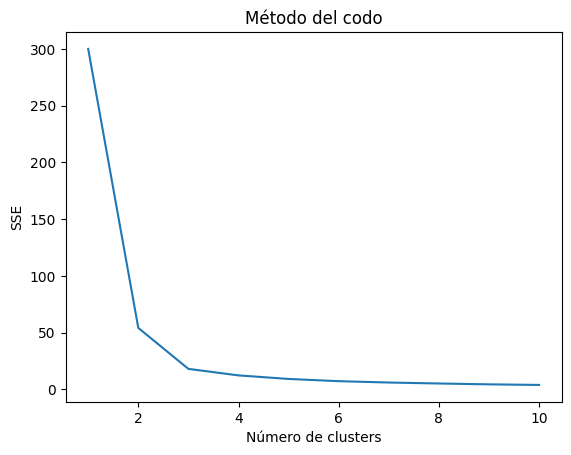

In [52]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


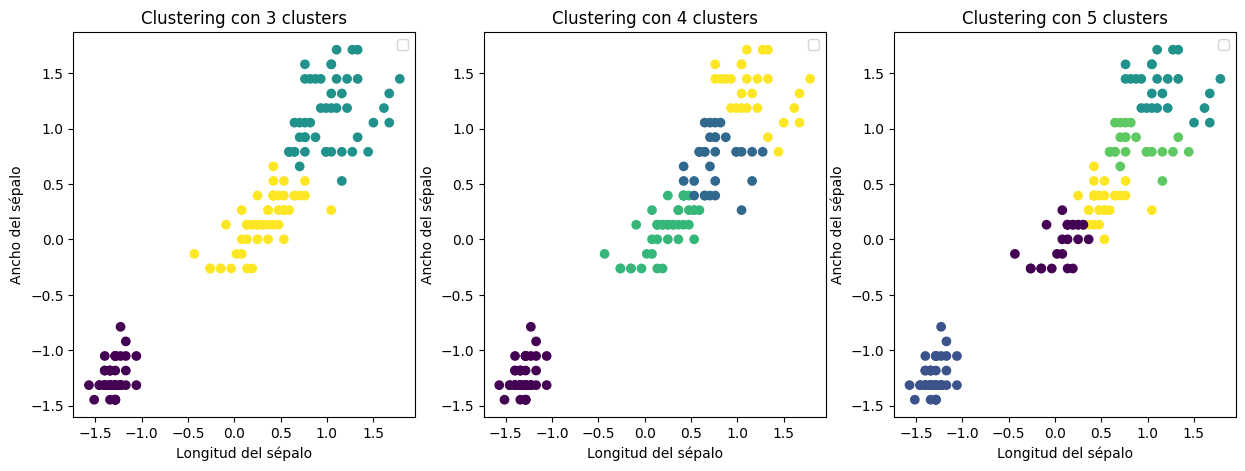

In [55]:
# realizar el clustering con diferentes valores de k
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# ajustar el modelo a los datos estandarizados
y_kmeans_3 = kmeans_3.fit_predict(X_std)
y_kmeans_4 = kmeans_4.fit_predict(X_std)
y_kmeans_5 = kmeans_5.fit_predict(X_std)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_3, cmap='viridis')
plt.title('Clustering con 3 clusters')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.legend()

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_4, cmap='viridis')
plt.title('Clustering con 4 clusters')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.legend()

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_5, cmap='viridis')
plt.title('Clustering con 5 clusters')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.legend()

plt.show()

In [56]:
from sklearn.metrics import adjusted_rand_score

# realizar el clustering con el valor de k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(X_std)

iris_data_with_labels = pd.read_csv("iris-con-respuestas.csv")
y_true = iris_data_with_labels.iloc[:, 4].values

# calcular el índice de Rand ajustado (ARI) para comparar la solución de clustering con las etiquetas reales
ari = adjusted_rand_score(y_true, y_pred)
print("Índice de Rand ajustado (ARI):", ari)

Índice de Rand ajustado (ARI): 0.8856970310281228
